## 2. Численный метод

In [4]:
from math import log # импортируем log из math
from math import e # импортируем e из math
import matplotlib.pyplot as plt # Подключаем библиотеку для графиков

# Значение функции в точке x, y
def f(x, y):
    return x**2 * y**2 * log(x**2 + y**2)

# Градиент функции в точке x, y
def grad(x, y):
    p1 = 2 * x * y**2 * (x ** 2 / (x ** 2 + y ** 2) + log(x**2 + y**2)) # Считаем частные производные
    p2 = 2 * x**2 * y * (y ** 2 / (x ** 2 + y ** 2) + log(x**2 + y**2))
    return (p1, p2)

# Принимает точку и параметр a_k и возвращает point + a_k * grad(point)
def step(point, a_k):
    new_x = point[0] - a_k * grad(*point)[0] # тут минус, так как ищем точку минимума
    new_y = point[1] - a_k * grad(*point)[1]
    return (new_x, new_y)

Ожидаем, что в итоге получим точку $\left(\frac{1}{\sqrt{2}\sqrt[4]{e}}, \frac{1}{\sqrt{2}\sqrt[4]{e}}\right)$, посчитаем чему она равна:

In [5]:
actual_answer = (1/(2**(1/2) * e**(1/4)), 1/(2**(1/2) * e**(1/4)))
actual_answer

(0.5506953149031838, 0.5506953149031838)

В качестве стартовой точки возьмём точку (1, 1), в силу того, что если взять достаточно большую точку, то полученные значения функции не влезут в переменные в питоне и получится точка (nan, nan), чего мы не хотим. Для начала проверим $a_k$ = 1e-3, и как условие остановки $|\Delta f| < \varepsilon$, где $\varepsilon = 1e-4$

Настоящая точка: (0.5506953149031838, 0.5506953149031838)
Получаенный ответ (0.6653569781939009, 0.6653569781939009) за 477 шагов


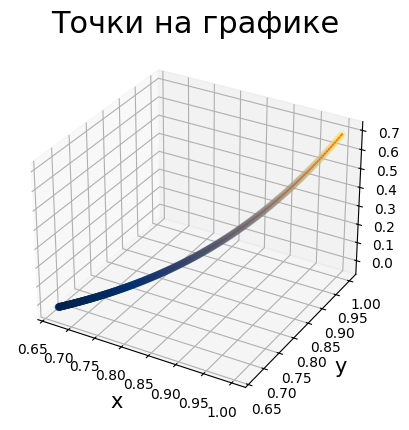

In [54]:
start_point = (1, 1)
points_x = [1] # Массив точек для графика
points_y = [1] # Массив точек для графика
points_z = [f(*start_point)] # Массив точек для графика
a_k = 1e-3
steps = 0
eps = 1e-4
delta_f = 1
while delta_f >= eps:
    steps += 1
    point = step(start_point, a_k)
    delta_f = abs(f(*point) - f(*start_point))
    points_x.append(point[0])
    points_y.append(point[1])
    points_z.append(f(*point))
    start_point = point

print('Настоящая точка:', actual_answer)
print('Получаенный ответ {} за {} шагов'.format(point, steps))
# Некоторые махинации с графиком
ax = plt.axes(projection="3d")
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Точки на графике', fontsize=22)
ax.plot3D(points_x, points_y, points_z, 'red')
ax.scatter3D(points_x, points_y, points_z, c=points_z, cmap='cividis', alpha=0.3)
plt.show()

В качестве ответа получили не совсем то, что хотели, попробуем уменьшить $\varepsilon$

Настоящая точка: (0.5506953149031838, 0.5506953149031838)
Получаенный ответ (0.5512757345669331, 0.5512757345669331) за 4470 шагов


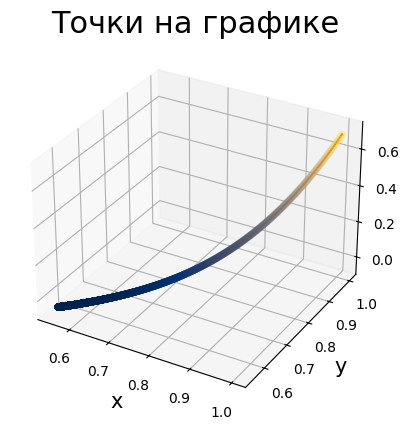

In [55]:
start_point = (1, 1)
points_x = [1] # Массив точек для графика
points_y = [1] # Массив точек для графика
points_z = [f(*start_point)] # Массив точек для графика
a_k = 1e-3
steps = 0
eps = 1e-9
delta_f = 1
while delta_f >= eps:
    steps += 1
    point = step(start_point, a_k)
    delta_f = abs(f(*point) - f(*start_point))
    points_x.append(point[0])
    points_y.append(point[1])
    points_z.append(f(*point))
    start_point = point

print('Настоящая точка:', actual_answer)
print('Получаенный ответ {} за {} шагов'.format(point, steps))
ax = plt.axes(projection="3d")
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Точки на графике', fontsize=22)
ax.plot3D(points_x, points_y, points_z, 'red')
ax.scatter3D(points_x, points_y, points_z, c=points_z, cmap='cividis', alpha=0.3)
plt.show()

Уже больше похоже на правду, но всё ещё недостаточно точно, попробуем изменить условие останова на малость приращения аргумента

In [23]:
# Вычислим приращение аргумента
def len_inc(old_point, new_point):
    delta_x = new_point[0] - old_point[0]
    delta_y = new_point[1] - old_point[1]
    return (delta_x**2 + delta_y**2)**(1/2)

Настоящая точка: (0.5506953149031838, 0.5506953149031838)
Получаенный ответ (0.5506958966330928, 0.5506958966330928) за 10157 шагов


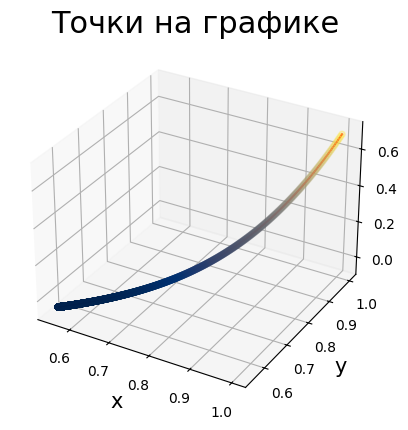

In [56]:
start_point = (1, 1)
points_x = [1] # Массив точек для графика
points_y = [1] # Массив точек для графика
points_z = [f(*start_point)] # Массив точек для графика
a_k = 1e-3
steps = 0
delta = 1e-4
delta_xy = 1
while delta_xy >= eps:
    steps += 1
    point = step(start_point, a_k)
    delta_xy = len_inc(start_point, point)
    points_x.append(point[0])
    points_y.append(point[1])
    points_z.append(f(*point))
    start_point = point

print('Настоящая точка:', actual_answer)
print('Получаенный ответ {} за {} шагов'.format(point, steps))
ax = plt.axes(projection="3d")
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Точки на графике', fontsize=22)
ax.plot3D(points_x, points_y, points_z, 'red')
ax.scatter3D(points_x, points_y, points_z, c=points_z, cmap='cividis', alpha=0.3)
plt.show()

Получили ошибку гораздо меньше, но количество шагов выросло, теперь попробуем изменить $a_k$, ранее использовали только постоянное значение, давайте сделаем линейное убывание

Настоящая точка: (0.5506953149031838, 0.5506953149031838)
Получаенный ответ (0.5506953203321138, 0.5506953203321138) за 140 шагов


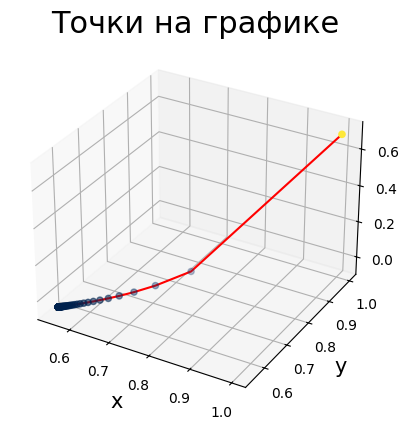

In [58]:
start_point = (1, 1)
points_x = [1] # Массив точек для графика
points_y = [1] # Массив точек для графика
points_z = [f(*start_point)] # Массив точек для графика
a_k = 1e-1 # Начнём с 0.1
delta_a_k = 1e-4 # И будем уменьшать на 1e-4
steps = 0
delta = 1e-4
delta_xy = 1
while delta_xy >= eps:
    steps += 1
    point = step(start_point, a_k)
    delta_xy = len_inc(start_point, point)
    points_x.append(point[0])
    points_y.append(point[1])
    points_z.append(f(*point))
    a_k -= delta_a_k
    start_point = point

print('Настоящая точка:', actual_answer)
print('Получаенный ответ {} за {} шагов'.format(point, steps))
ax = plt.axes(projection="3d")
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Точки на графике', fontsize=22)
ax.plot3D(points_x, points_y, points_z, 'red')
ax.scatter3D(points_x, points_y, points_z, c=points_z, cmap='cividis')
plt.show()

Количество шагов сильно уменьшилось и точность выросла, но у этого подхода есть очевидные проблемы с тем, что $a_k$ может стать отрицательным, поэтому попробуем геометрическую прогрессию

Настоящая точка: (0.5506953149031838, 0.5506953149031838)
Получаенный ответ (0.5506953194814428, 0.5506953194814428) за 131 шагов


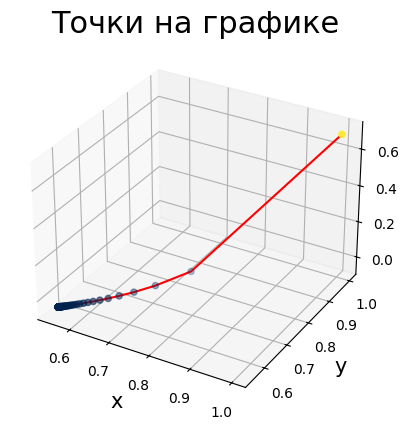

In [59]:
start_point = (1, 1)
points_x = [1] # Массив точек для графика
points_y = [1] # Массив точек для графика
points_z = [f(*start_point)] # Массив точек для графика
a_k = 1e-1 # Начнём с 0.1
delta_a_k = 1 - 1e-6 # И будем уменьшать в 0.999999 раз
steps = 0
delta = 1e-4
delta_xy = 1
while delta_xy >= eps:
    steps += 1
    point = step(start_point, a_k)
    delta_xy = len_inc(start_point, point)
    points_x.append(point[0])
    points_y.append(point[1])
    points_z.append(f(*point))
    a_k = a_k * delta_a_k
    start_point = point

print('Настоящая точка:', actual_answer)
print('Получаенный ответ {} за {} шагов'.format(point, steps))
ax = plt.axes(projection="3d")
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Точки на графике', fontsize=22)
ax.plot3D(points_x, points_y, points_z, 'red')
ax.scatter3D(points_x, points_y, points_z, c=points_z, cmap='cividis')
plt.show()

Количество шагов уменьшилось и точность выросла ещё сильнее, при этом у этого подхода нет проблем, которые есть у линейной прогрессии.
Так линейная прогрессия, если есть несколько локальных оптимумов может сойтись не к тому, грубо говоря перелетать нужный нам ответ, что менее вероятно в геометрической прогрессии, так как только первые несколько шагов в ней будут иметь большое $a_k$, а следующие будут сильно меньше. Что, конечно, тоже зависит от выбранных изначальных значений и приращения.